In [ ]:
import numpy as np 
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_friedman1

In [4]:
X,y = make_friedman1(n_samples=10000, n_features=5, noise=1.0, random_state=42)


In [5]:
print (X.shape, y.shape)

(10000, 5) (10000,)


In [6]:
import pandas as pd
df =pd.DataFrame(X, columns=['X1','X2','X3','X4','X5'])
df['y'] =y
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      10000 non-null  float64
 1   X2      10000 non-null  float64
 2   X3      10000 non-null  float64
 3   X4      10000 non-null  float64
 4   X5      10000 non-null  float64
 5   y       10000 non-null  float64
dtypes: float64(6)
memory usage: 468.9 KB


In [7]:
X = df.drop(columns=['y'])
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
X = np.arange(0,1,0.02).reshape(-1,1)
y = 0.7*X + 0.3

print(X[:5], y[:5])
print("shape of X =" , X.shape)
print("shape of y =",y.shape)

[[0.  ]
 [0.02]
 [0.04]
 [0.06]
 [0.08]] [[0.3  ]
 [0.314]
 [0.328]
 [0.342]
 [0.356]]
shape of X = (50, 1)
shape of y = (50, 1)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=18)

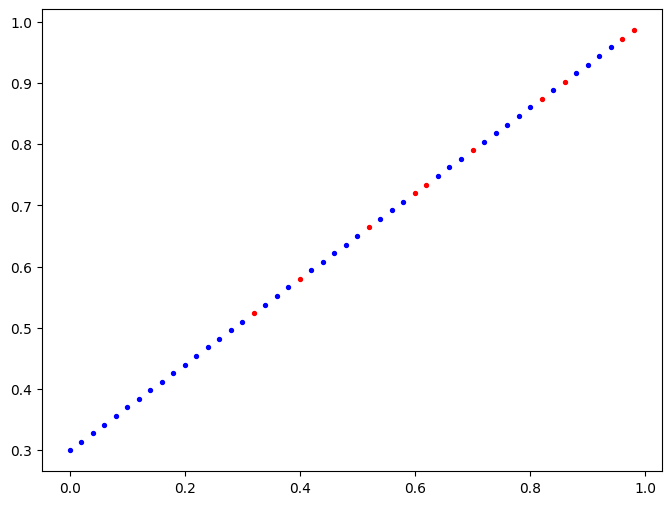

In [11]:
def plot_data(X_train=X_train, y_train=y_train,X_test=X_test,
              y_test=y_test, predictions=None):
    plt.figure(figsize=(8,6))
    plt.scatter(X_train, y_train,c='b',s=8,label="Training Data")
    plt.scatter(X_test, y_test ,c='r',s=8,label="Testing Data")
    if predictions is not None:
        plt.scatter(X_test, predictions, c='g',s=8, label='Prediction Data')
        plt.legend()
        plt.title("X vs y")
        plt.show()

plot_data()

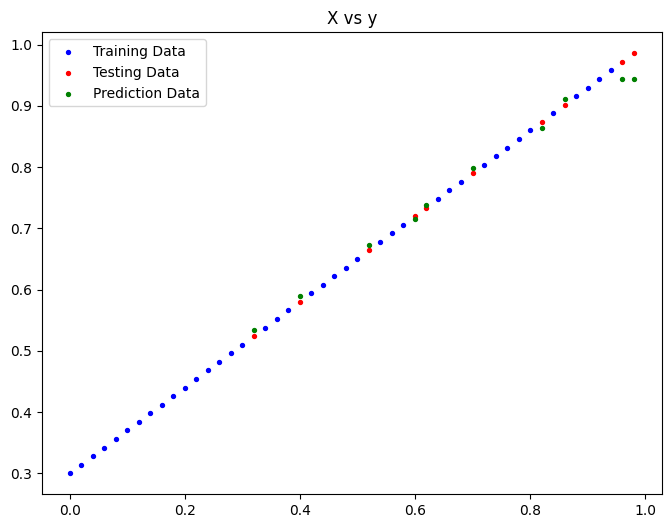

In [12]:

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(X_train,y_train)
y_preds = knr.predict(X_test)
plot_data(predictions=y_preds)

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(f"MSE={mean_squared_error(y_test,y_preds):.4f}")
print(f"MAE={mean_absolute_error(y_test,y_preds):.4f}")
print(f"R^2 Score = {r2_score(y_test,y_preds):.4f}")

MSE=0.0003
MAE=0.0154
R^2 Score = 0.9888


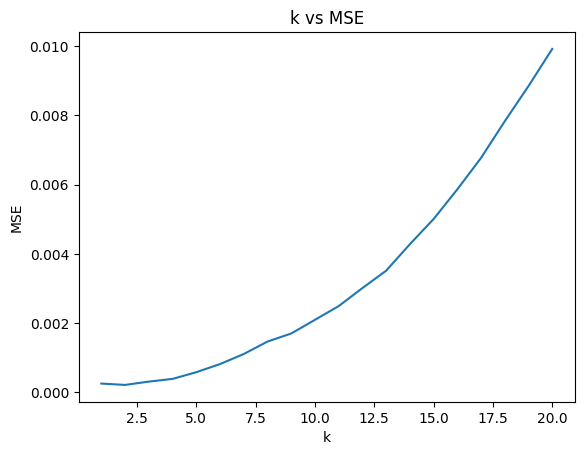

Best value of k =2


In [15]:
#find best k for kNeighborRegression range (1,21).find k that gives lowest MSE

best_mse =[]
for k in range(1,21):
    knr =KNeighborsRegressor(n_neighbors=k)
    knr.fit(X_train,y_train)
    y_preds= knr.predict(X_test)
    best_mse.append(mean_squared_error(y_test,y_preds))

plt.plot(range(1,21), best_mse)
plt.title("k vs MSE")
plt.xlabel('k')
plt.ylabel('MSE')
plt.show()

best_k =range(1,5) [np.argmin(best_mse)]
print(f'Best value of k ={best_k}')

In [15]:
knr = KNeighborsRegressor(n_neighbors=14)
knr.fit(X_train, y_train)
y_preds = knr.predict(X_test)
print(f"MSE = {mean_squared_error(y_test,y_preds):.4f}")
print(f"MAE = {mean_absolute_error(y_test,y_preds):.4f}")
print(f"R^2 Score = {r2_score(y_test,y_preds):.4f}")


MSE = 1.7961
MAE = 1.0566
R^2 Score = 0.9251


In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_preds = dtr.predict(X_test)
print(f"MSE = {mean_squared_error(y_test,y_preds):.4f}")
print(f"MAE = {mean_absolute_error(y_test,y_preds):.4f}")
print(f"R^2 Score = {r2_score(y_test,y_preds):.4f}")



MSE = 0.0003
MAE = 0.0154
R^2 Score = 0.9888


In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_preds = rfr.predict (X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(f"MSE = {mean_squared_error(y_test,y_preds):.4f}")
print(f"MAE = {mean_absolute_error(y_test,y_preds):.4f}")
print(f"R^2 Score = {r2_score(y_test,y_preds):.4f}")




MSE = 2.0298
MAE = 1.1068
R^2 Score = 0.9154


In [20]:
from sklearn.neural_network import MLPRegressor

In [21]:
from timeit import default_timer as Timer
mlp= MLPRegressor(hidden_layer_sizes=(500,500,500,500), max_iter=2000)
start = Timer()
mlp.fit(X_train,y_train)
end = Timer()
y_preds =  mlp.predict(X_test)
print(f"Time taken is {end-start} second")
print(f"MSE = {mean_squared_error(y_test,y_preds):.4f}")
print(f"MAE = {mean_absolute_error(y_test,y_preds):.4f}")
print(f"R^2 Score = {r2_score(y_test,y_preds):.4f}")



c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Time taken is 1.6863270999892848 second
MSE = 0.0003
MAE = 0.0166
R^2 Score = 0.9871


In [1]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/filelock-3.13.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached https://download.pytorch.org/whl/sympy-1.13.3-py3-none-any.whl.metadata (12 kB)
  Using cached https://download.pytorch.org/whl/networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached https://download.pytorch.org/whl/fsspec-2024.6.1-py3-none-any.whl.metadata (11 kB)
  Using cached https://download.pytorch.org/whl/setuptools-70.2.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached https://download.pytorch.org/whl/mpmath-1.3.0-py3-none-any.whl (536 kB)
   ---------------------------------------- 0.0/2.9 GB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 GB 6.9 MB/s eta 0:07:03
   ---------------------------------------- 0.0/2.9 GB 6.2 MB/s eta 0:07:52
   ---------------------------------------- 0.0/2.9 GB 7.1 MB/s eta 0:06:51
   ---------------------------------------- 0.0/2.9 GB 7.2 MB/s eta 

In [2]:
!pip3 install torch torchvision torchaudio